In [107]:
pip install plotly --upgrade

Note: you may need to restart the kernel to use updated packages.


In [108]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [109]:
base_credit = pd.read_csv("credit_data.csv")
base_credit.describe()

clientid        income          age          loan      default
count  2000.000000   2000.000000  1997.000000   2000.000000  2000.000000
mean   1000.500000  45331.600018    40.807559   4444.369695     0.141500
std     577.494589  14326.327119    13.624469   3045.410024     0.348624
min       1.000000  20014.489470   -52.423280      1.377630     0.000000
25%     500.750000  32796.459717    28.990415   1939.708847     0.000000
50%    1000.500000  45789.117313    41.317159   3974.719419     0.000000
75%    1500.250000  57791.281668    52.587040   6432.410625     0.000000
max    2000.000000  69995.685578    63.971796  13766.051239     1.000000

In [110]:
np.unique(base_credit['default'],return_counts = True)

(array([0, 1], dtype=int64), array([1717,  283], dtype=int64))

<Axes: xlabel='default', ylabel='count'>

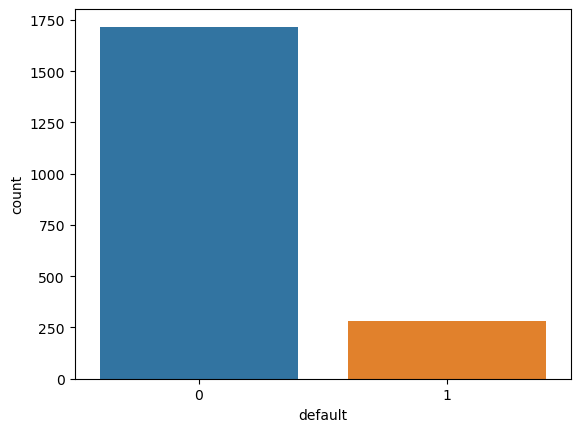

In [111]:
sns.countplot(x=base_credit['default']) # plota um grafico contando os valores unicos

(array([  1.,   1.,   1.,   0.,   0.,   0., 499., 467., 514., 514.]),
 array([-52.42327992, -40.78377234, -29.14426477, -17.50475719,
         -5.86524962,   5.77425796,  17.41376554,  29.05327311,
         40.69278069,  52.33228827,  63.97179584]),
 <BarContainer object of 10 artists>)

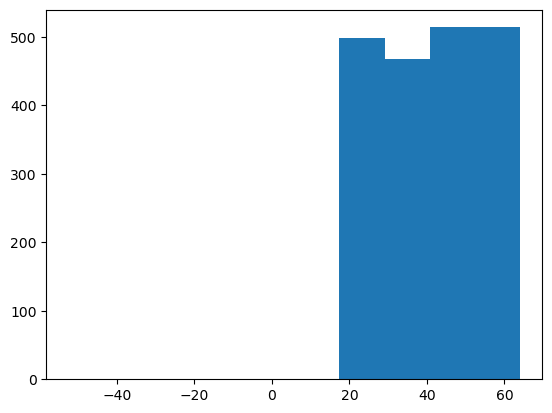

In [112]:
plt.hist(x=base_credit['age'])

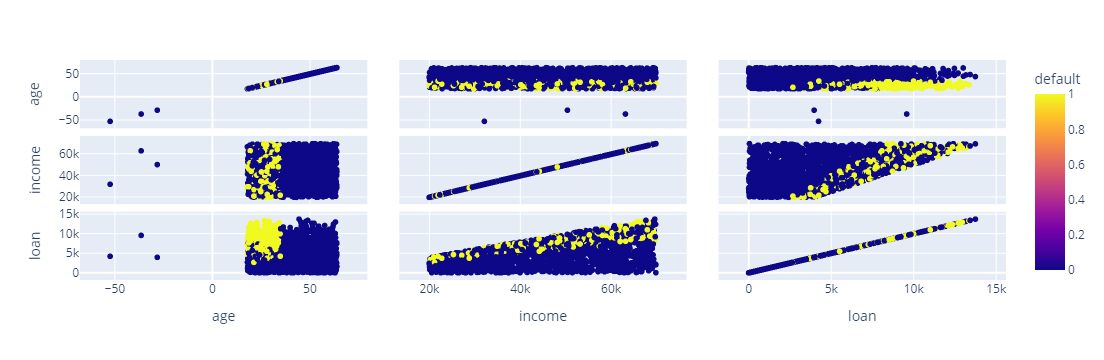

In [117]:
grafico = px.scatter_matrix(base_credit, dimensions = ['age','income','loan'], color = 'default' ) # passamos a base de dados que usaremos e as colunas que quweremos
# colore com base no resultado
grafico.show()

In [121]:
# precisamos passar o indice das linhas a serem removida
base_credit = base_credit.drop(base_credit[base_credit['age'] < 0].index) # filtrando para retirar os valores fora do padrao
base_credit

clientid        income        age         loan  default
0            1  66155.925095  59.017015  8106.532131        0
1            2  34415.153966  48.117153  6564.745018        0
2            3  57317.170063  63.108049  8020.953296        0
3            4  42709.534201  45.751972  6103.642260        0
4            5  66952.688845  18.584336  8770.099235        1
...        ...           ...        ...          ...      ...
1995      1996  59221.044874  48.518179  1926.729397        0
1996      1997  69516.127573  23.162104  3503.176156        0
1997      1998  44311.449262  28.017167  5522.786693        1
1998      1999  43756.056605  63.971796  1622.722598        0
1999      2000  69436.579552  56.152617  7378.833599        0

[1997 rows x 5 columns]

In [123]:
base_credit3 = pd.read_csv("credit_data.csv")
base_credit3['age'].mean()

40.80755937840458

In [125]:
idades_nn = base_credit3['age'] > 0
media=base_credit2[idades_nn]['age'].mean()

NameError: name 'base_credit2' is not defined

In [127]:
base_credit3.loc[base_credit3['age'] < 0, 'age'] = 40.92
base_credit3.loc[base_credit3['age'] < 0]


Empty DataFrame
Columns: [clientid, income, age, loan, default]
Index: []

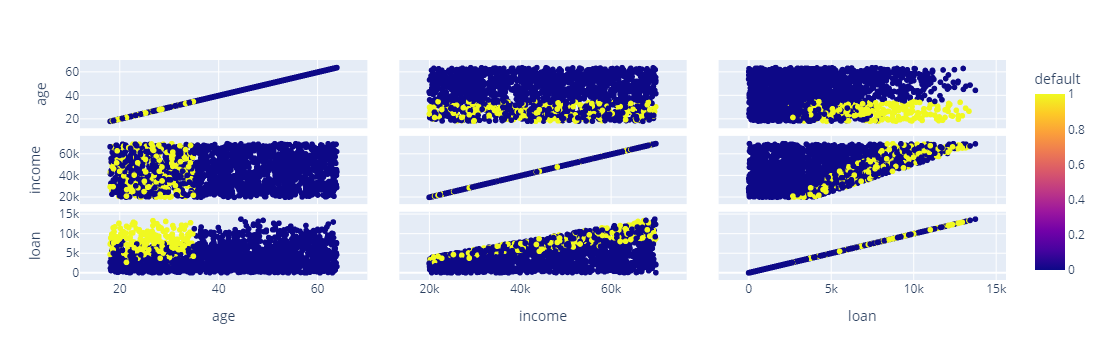

In [129]:
grafico = px.scatter_matrix(base_credit3, dimensions = ['age','income','loan'], color = 'default' ) # passamos a base de dados que usaremos e as colunas que quweremos
# colore com base no resultado
grafico.show()

In [131]:
base_credit3.isna().sum() # para ver o numero de linhas nas colunas com atributos vazios

clientid    0
income      0
age         3
loan        0
default     0
dtype: int64

In [141]:
# dividindo em previsores e classe
X_credit = base_credit.iloc[:, 1:4].values
y_credit = base_credit.iloc[:, 4].values

In [179]:
# é importante que todos estejam na mesma escala, pois dessa forma o algoritmo não entenderá que um é mais importante que o outro
from sklearn.preprocessing import StandardScaler
scaler_credit = StandardScaler()
X_credit = scaler_credit.fit_transform(X_credit) # ajusta e transforma os valores para escalonar e não deixa-los tão distantes

In [145]:
"""
Temos 4 tipos de variaveis possiveis a serem observadas em uma base de dados
Dados númericos, que podem ser divididos em :
Dados discretos, que são números inteiros como por exemplo uma idade 
Dados continuos, 

e Dados Categóricos, que podem ser divididos em:
Dados Ordinais: Strings que apresentam alguma espécie de ordem, como tamanhos de camisa por exemplo (P,M,G)
Dados Nominais: Strings que são apenas nomes, não apresentam nenhuma ordem ou crescimento

"""
base_censo = pd.read_csv('census.csv')
base_censo

age          workclass  final-weight    education  education-num  \
0       39          State-gov         77516    Bachelors             13   
1       50   Self-emp-not-inc         83311    Bachelors             13   
2       38            Private        215646      HS-grad              9   
3       53            Private        234721         11th              7   
4       28            Private        338409    Bachelors             13   
...    ...                ...           ...          ...            ...   
32556   27            Private        257302   Assoc-acdm             12   
32557   40            Private        154374      HS-grad              9   
32558   58            Private        151910      HS-grad              9   
32559   22            Private        201490      HS-grad              9   
32560   52       Self-emp-inc        287927      HS-grad              9   

            marital-status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spouse     Exec-managerial         Husband   White   
2                 Divorced   Handlers-cleaners   Not-in-family   White   
3       Married-civ-spouse   Handlers-cleaners         Husband   Black   
4       Married-civ-spouse      Prof-specialty            Wife   Black   
...                    ...                 ...             ...     ...   
32556   Married-civ-spouse        Tech-support            Wife   White   
32557   Married-civ-spouse   Machine-op-inspct         Husband   White   
32558              Widowed        Adm-clerical       Unmarried   White   
32559        Never-married        Adm-clerical       Own-child   White   
32560   Married-civ-spouse     Exec-managerial            Wife   White   

           sex  capital-gain  capital-loos  hour-per-week  native-country  \
0         Male          2174             0             40   United-States   
1         Male             0             0             13   United-States   
2         Male             0             0             40   United-States   
3         Male             0             0             40   United-States   
4       Female             0             0             40            Cuba   
...        ...           ...           ...            ...             ...   
32556   Female             0             0             38   United-States   
32557     Male             0             0             40   United-States   
32558   Female             0             0             40   United-States   
32559     Male             0             0             20   United-States   
32560   Female         15024             0             40   United-States   

       income  
0       <=50K  
1       <=50K  
2       <=50K  
3       <=50K  
4       <=50K  
...       ...  
32556   <=50K  
32557    >50K  
32558   <=50K  
32559   <=50K  
32560    >50K  

[32561 rows x 15 columns]

In [147]:
base_censo.isna().sum() # ver se há valores nulos

age               0
workclass         0
final-weight      0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loos      0
hour-per-week     0
native-country    0
income            0
dtype: int64

In [149]:
np.unique(base_censo['income'], return_counts = True)

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841], dtype=int64))

<Axes: xlabel='income', ylabel='count'>

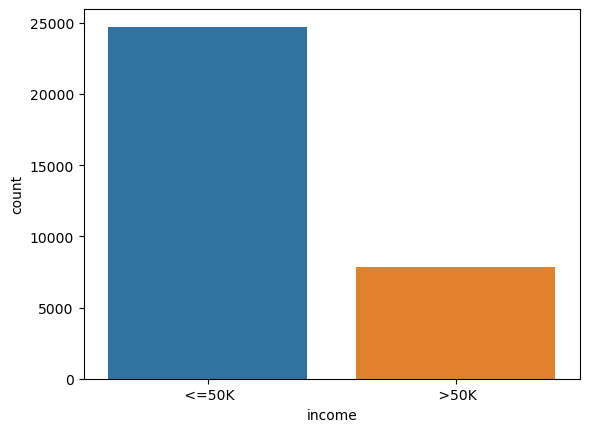

In [151]:
sns.countplot(x = base_censo['income'])

(array([5570., 5890., 6048., 6163., 3967., 2591., 1595.,  496.,  174.,
          67.]),
 array([17. , 24.3, 31.6, 38.9, 46.2, 53.5, 60.8, 68.1, 75.4, 82.7, 90. ]),
 <BarContainer object of 10 artists>)

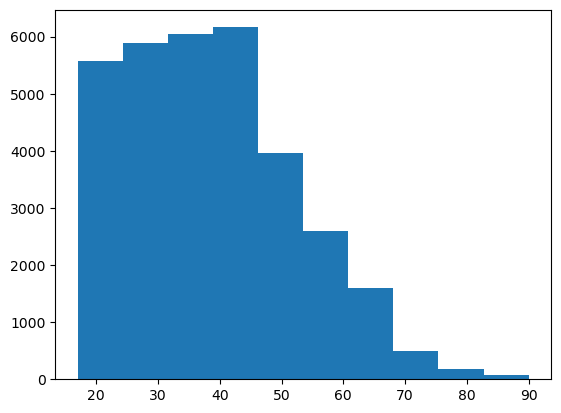

In [153]:
plt.hist(x = base_censo['age'])

(array([  736.,  2192.,  2317., 17735.,  3119.,  3877.,  1796.,   448.,
          202.,   139.]),
 array([ 1. , 10.8, 20.6, 30.4, 40.2, 50. , 59.8, 69.6, 79.4, 89.2, 99. ]),
 <BarContainer object of 10 artists>)

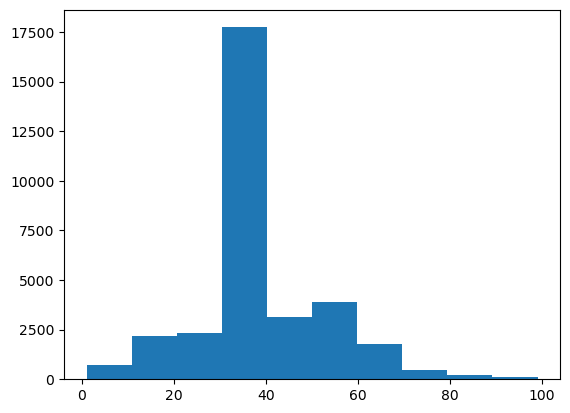

In [155]:
plt.hist(x = base_censo['hour-per-week'])

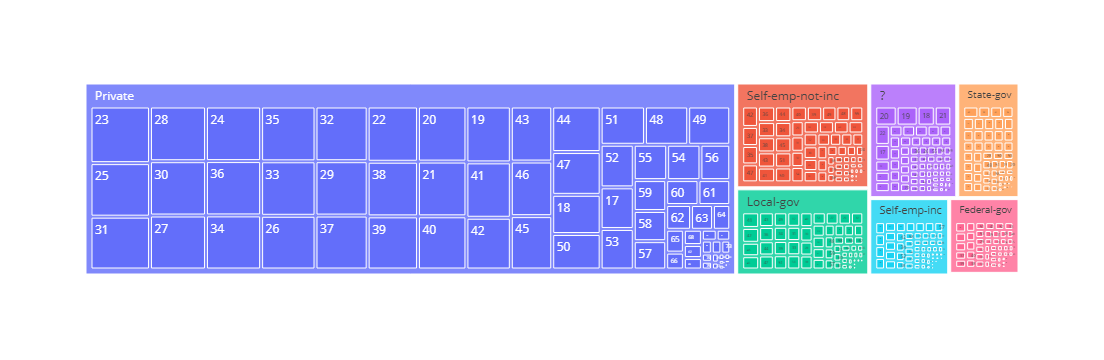

In [157]:
grafico = px.treemap(base_censo, path = ['workclass','age'])
grafico.show()

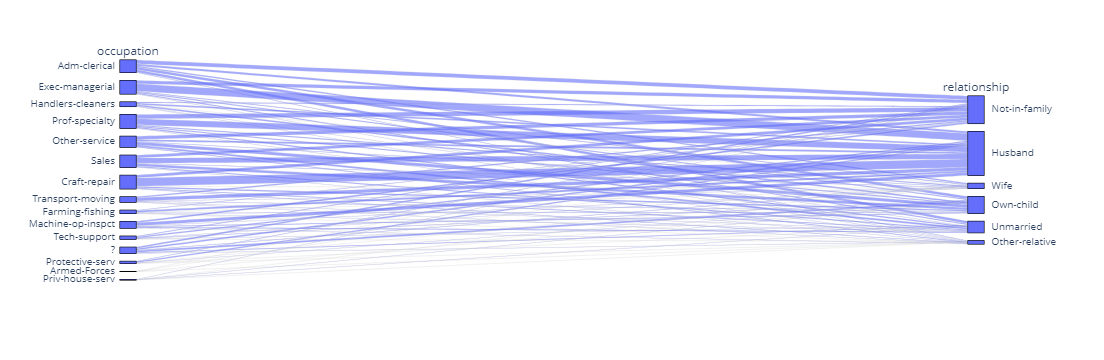

In [158]:
grafico = px.parallel_categories(base_censo, dimensions = ['occupation', 'relationship'])
grafico.show()

In [159]:
X_censo = base_censo.iloc[:, 0:14].values
y_censo = base_censo.iloc[:, 14].values

In [163]:
# precisamos converter as colunas com dados categoricos(strings) em números
from sklearn.preprocessing import LabelEncoder
label_encoder_teste = LabelEncoder()
teste = label_encoder_teste.fit_transform(X_censo[:,1])
teste

array([7, 6, 4, ..., 4, 4, 5])

In [165]:
label_encoder_workclass = LabelEncoder()
label_encoder_education = LabelEncoder()
X_censo[:,1] = label_encoder_workclass.fit_transform(X_censo[:,1]) 
# o LabelEncoder tem um problema no qual com muitos labels diferentes o intervalo de números pode ficar muito grande, podendo deturpar o algoritmo

In [167]:
# para isso temos o OneHotEncoder, com ele ao inves de associarmos uma sequencia de números a possibilidade de labels, nos
# criamos varias colunas para isso, por exemplo:
"""
      Carro
Uno   Mobi    Kwid           // isso seria com o LabelEncoder        
 1      2       3        

Uno   Mobi    Kwid           // com o OneHotEncoder, fazemos isso indicando com 0 e 1 cada coluna, sendo 0 para indicar que aquilo não é verdade e 1 para 
                                indicar que é verdade
 0      0       1
"""

'\n      Carro\nUno   Mobi    Kwid           // isso seria com o LabelEncoder        \n 1      2       3        \n\nUno   Mobi    Kwid           // com o OneHotEncoder, fazemos isso indicando com 0 e 1 cada coluna, sendo 0 para indicar que aquilo não é verdade e 1 para \n                                indicar que é verdade\n 0      0       1\n'

In [173]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
# passamos como argumento no transformer o encoder que vamos usar (OneHotEncoder) e os indices das colunas que queremos transformar
# alem disso precisamos colocar remainder = passthrough para que ele não apague os valores ja numericos
one_hot_encoder = OneHotEncoder()
hot_encoder_censo = ColumnTransformer(transformers = [('OneHot',one_hot_encoder,[1,3,5,6,7,8,9,13])],remainder="passthrough")
X_censo = hot_encoder_censo.fit_transform(X_censo).toarray() # com o transformador ja feito, chamamos o metodo fit_transform para ele ajustar e transformar e tranformamos em um array do numpy

In [183]:
X_censo.shape

(32561, 108)

In [ ]:
from sklearn.preprocessing import StandardScaler
escalanizador = StandardScaler()
escalanizador.fit_trasform(X_censo) # escalonando os valores para não termos grandes diferenças

In [191]:
from sklearn.model_selection import train_test_split

In [195]:
X_credit_treinamento, X_credit_teste, y_credit_treinamento, y_credit_teste = train_test_split(X_credit,y_credit,test_size=0.25,random_state=0)

In [197]:
X_credit_treinamento.shape

(1497, 3)

In [199]:
X_censo_treinamento,X_censo_teste, y_censo_treinamento, y_censo_teste = train_test_split(X_censo,y_censo,test_size=0.15,random_state=0)

In [201]:
X_censo_treinamento.shape

(27676, 108)

In [205]:
# salvando nossos dados preprocessados
import pickle
with open ('credit.pkl', mode = 'wb') as f:
    pickle.dump([X_credit_treinamento, X_credit_teste, y_credit_treinamento, y_credit_teste],f)
with open ('censo.pkl', mode = 'wb') as f:
    pickle.dump([X_censo_treinamento,X_censo_teste, y_censo_treinamento, y_censo_teste],f)